# Assignment 5: Analyzing Data

In [3]:
## Import Libraries
import pandas as pd
import numpy as np

# Show plots in the notebook
%matplotlib inline

# Set the maximum amount of rows displayed at one time
from pandas import set_option
set_option('display.max_rows',5)

In [4]:
# Load dataset as wind

wind = pd.read_csv('Squamish.Wind.2010-2015.csv',sep=',')

In [5]:
# Get a peak at the data
wind

,datetime,windspeed,winddir,windgust,temperature,pressure
0,6/16/10 1:00,18,225,21,131,15
1,6/16/10 1:03,16,227,21,138,15
...,...,...,...,...,...,...
438125,4/21/15 3:51,8,196,10,143,9
438126,4/21/15 3:54,8,196,10,143,9


I loaded the data in Pandas because I like the commands in Pandas more than Numpy.  I don't have enough data to necessitate using Blaze or PyTables.  Also, my data has titles and Pandas automatically recognizes the titles.  

Now, I'm going to make a custom function that centers my data, then apply that function to my data making a new object called wind_centered.  This could be useful for further statistical applications

In [6]:
## Creating a function

def center(data):
    """Custom function to center data"""
    return data - data.mean()

In [7]:
## Function using the Apply method.  I didn't apply the function to the first column because it
# doesn't make sense to center the datetime column

wind_centered = wind.iloc[:,1:].apply(center)
wind_centered

,windspeed,winddir,windgust,temperature,pressure
0,9.630829,25.045163,9.712791,31.538422,-0.450541
1,7.630829,27.045163,9.712791,38.538422,-0.450541
...,...,...,...,...,...
438125,-0.369171,-3.954837,-1.287209,43.538422,-6.450541
438126,-0.369171,-3.954837,-1.287209,43.538422,-6.450541


Now, I'm going going to reload the data using the datetime column as the index so I will be able to resample it.

In [40]:
wind2 = pd.read_csv('Squamish.Wind.2010-2015.csv',sep=',',index_col='datetime')
wind2

,windspeed,winddir,windgust,temperature,pressure
datetime,,,,,
6/16/10 1:00,18,225,21,131,15
6/16/10 1:03,16,227,21,138,15
...,...,...,...,...,...
4/21/15 3:51,8,196,10,143,9
4/21/15 3:54,8,196,10,143,9


In [54]:
type(wind2)

pandas.core.frame.DataFrame

In [41]:
## Now I'm making the wind2 object know that it has a DatetimeIndex
wind2.index = pd.to_datetime(wind2.index,unit='ms')
type(wind2.index)

pandas.tseries.index.DatetimeIndex

In [50]:
##  Now I'm resampling the data, using a 20 day average.
wind_resampled = wind2.resample('20D',how = 'mean')

In [51]:
## Checking the shape of the resampled data, I know have 89 rows instead of > 500,000
wind_resampled.shape

(89, 5)

Now, I'm going to make plots of all of my variables overtime using the resampled data so I can get an idea of what windspeed, wind direction, wind gust speed, temperature and pressure look like over 5 years.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d274b70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10dda3cf8>], dtype=object)

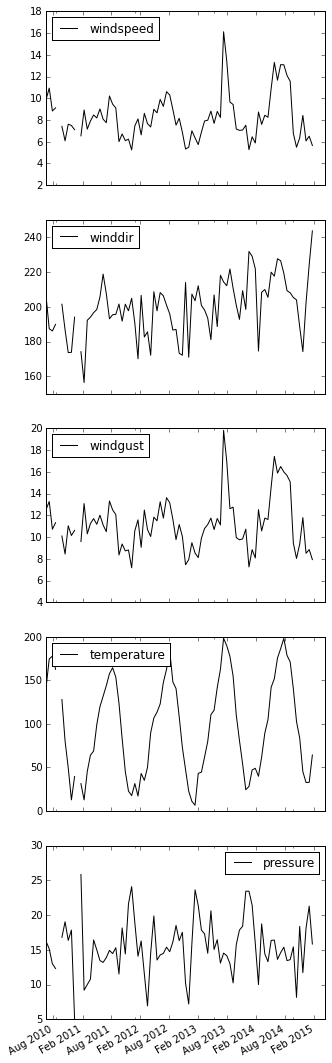

In [53]:
wind_resampled.plot(subplots=True,figsize=(5,20))

Now, I will just plot wind speed over time

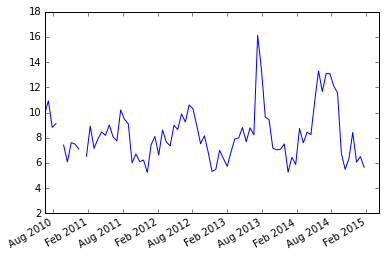

In [58]:
wind_resampled['windspeed'].plot()

1) I chose to center my data because I think it may be useful for doing more statistical analysis in the future.
2) I chose to resample the data because I have over 500,000 data points.  When I graph the original data, it is too jagged to gain a general idea of the patterns of the data.  However, when it is resampled, I can gain more of a general idea of what is going on.
3) I chose to graph the data to get a visual idea of how my variables (windspeed, wind direction, wind gust speed, temperature and pressure) change over time. 
From this final visualization, I can tell that windspeeds on the Squamish oceanfront are generally higher in the summer months, and lower in the winter months.  Temperature follows this same pattern (as expected).